In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Содержание

In [2]:
df = pd.read_csv(r'..\data\csv\housing_prices_mortgage_rates.csv')
df.head(10)

,date,key_rate,us_rate,inflation,region,avg_rate,weight_avg_rate,price,index,income
0,2019-01-01,7.75,67.08,5.0,Алтайский край,9.87,9.87,44653.65,107.72,20502.22
1,2019-01-01,7.75,69.47,5.0,Сахалинская область,9.82,9.82,104951.18,129.42,54127.73
2,2019-01-01,7.75,69.47,5.0,Свердловская область,9.86,9.86,63200.01,105.06,33777.48
3,2019-01-01,7.75,69.47,5.0,Севастополь,10.49,10.49,65765.90,115.12,21086.93
4,2019-01-01,7.75,69.47,5.0,Смоленская область,9.90,9.90,40099.94,104.22,24548.67
5,2019-01-01,7.75,69.47,5.0,Ставропольский край,9.89,9.89,38265.51,114.53,20270.97
6,2019-01-01,7.75,69.47,5.0,Тамбовская область,9.87,9.87,36974.03,105.60,23620.63
7,2019-01-01,7.75,69.47,5.0,Татарстан,9.85,9.85,64170.01,106.68,30620.32
8,2019-01-01,7.75,69.47,5.0,Тверская область,9.88,9.88,45524.83,101.66,24493.05
9,2019-01-01,7.75,69.47,5.0,Томская область,9.78,9.78,50769.15,108.92,26585.94


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9572 entries, 0 to 9571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             9572 non-null   object 
 1   key_rate         9572 non-null   float64
 2   us_rate          9572 non-null   float64
 3   inflation        9572 non-null   float64
 4   region           9572 non-null   object 
 5   avg_rate         9572 non-null   float64
 6   weight_avg_rate  9572 non-null   float64
 7   price            9572 non-null   float64
 8   index            9572 non-null   float64
 9   income           9572 non-null   float64
dtypes: float64(8), object(2)
memory usage: 747.9+ KB


Рассмотрим основные статистические показатели (среднее, стандартное отклонение, минимум, максимум и т.д.)

In [8]:
df[df['region'] == 'Россия'].describe().round(2)

,key_rate,us_rate,inflation,avg_rate,weight_avg_rate,price,index,income
count,1683.00,1683.00,1683.00,1683.00,1683.00,1683.00,1683.00,1683.00
mean,8.49,74.56,6.94,8.39,8.39,71801.27,112.59,36445.16
std,3.96,11.18,3.95,0.96,0.96,19364.06,10.66,7763.09
min,4.25,51.16,2.30,7.16,7.16,52763.85,100.97,24862.21
25%,6.00,65.14,4.00,7.62,7.62,53244.92,104.34,29187.82
50%,7.50,73.52,5.80,8.15,8.15,63216.84,109.17,34759.29
75%,8.50,79.47,8.39,8.89,8.89,88730.76,117.43,43145.00
max,20.00,120.38,17.83,10.34,10.34,175075.58,138.06,65470.00


Анализ распределений

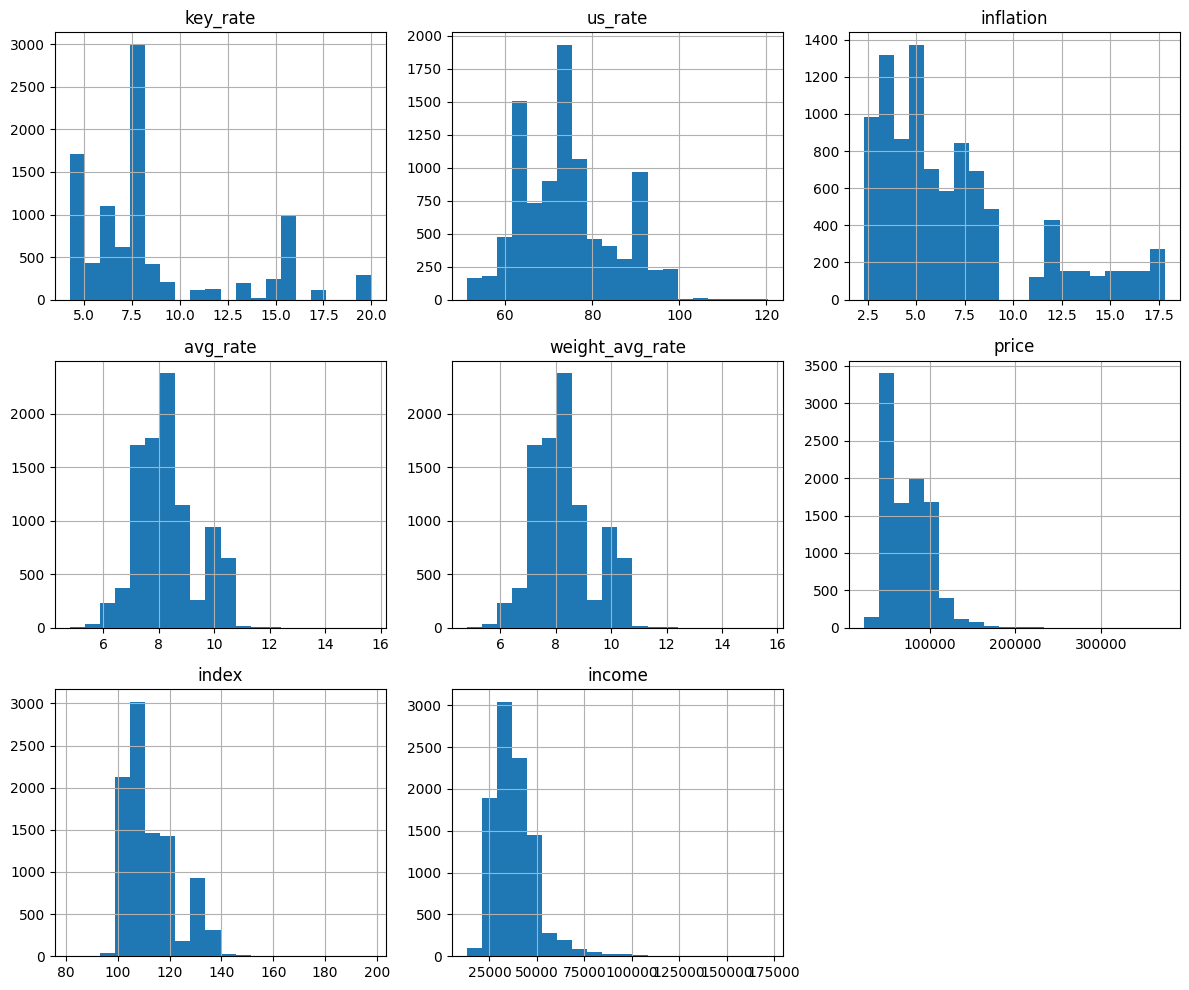

In [9]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

### Характер распределения признаков

1. **`key_rate` (Ключевая ставка)**  
   - **Характер распределения**: Скошенное вправо (правосторонняя асимметрия).  
   - **Описание**: Большинство значений сосредоточено в диапазоне от 5.0 до 10.0, с редкими выбросами в сторону более высоких значений (до 20.0).  

2. **`us_rate` (Курс доллара)**  
   - **Характер распределения**: Скошенное вправо (правосторонняя асимметрия).  
   - **Описание**: Основная масса данных находится в диапазоне от 60 до 80, с редкими выбросами в сторону более высоких значений (до 120).  

3. **`inflation` (Инфляция)**  
   - **Характер распределения**: Скошенное вправо (правосторонняя асимметрия).  
   - **Описание**: Большинство значений лежит в диапазоне от 5.0 до 10.0, с редкими выбросами в сторону более высоких значений (до 17.5).  

4. **`avg_rate` (Средняя ставка)**  
   - **Характер распределения**: Близкое к нормальному с небольшим смещением вправо.  
   - **Описание**: Основная масса данных сосредоточена в диапазоне от 8 до 12, с редкими выбросами в сторону более высоких значений (до 16).  

5. **`weight_avg_rate` (Средневзвешенная ставка)**  
   - **Характер распределения**: Близкое к нормальному с небольшим смещением вправо.  
   - **Описание**: Распределение похоже на `avg_rate`, с основными значениями в диапазоне от 8 до 12 и редкими выбросами в сторону более высоких значений (до 16).  

6. **`price` (Цена)**  
   - **Характер распределения**: Сильно скошенное вправо (правосторонняя асимметрия).  
   - **Описание**: Большинство значений сосредоточено в диапазоне до 200000, с редкими выбросами в сторону более высоких значений (до 300000).  

7. **`index` (Индекс)**  
   - **Характер распределения**: Близкое к нормальному с небольшим смещением вправо.  
   - **Описание**: Основная масса данных находится в диапазоне от 100 до 140, с редкими выбросами в сторону более высоких значений (до 180).  

8. **`income` (Доход)**  
   - **Характер распределения**: Сильно скошенное вправо (правосторонняя асимметрия).  
   - **Описание**: Большинство значений сосредоточено в диапазоне до 75000, с редкими выбросами в сторону более высоких значений (до 150000).  

---

### Итог:
- **Правосторонняя асимметрия**: Большинство признаков (`key_rate`, `us_rate`, `inflation`, `price`, `income`) имеют правостороннюю асимметрию, что указывает на наличие выбросов в сторону более высоких значений.  
- **Близкое к нормальному**: Признаки `avg_rate`, `weight_avg_rate` и `index` имеют распределение, близкое к нормальному, с небольшим смещением вправо.  
- **Выбросы**: В данных присутствуют выбросы, особенно в признаках `price` и `income`, что может потребовать дополнительного анализа или обработки.  

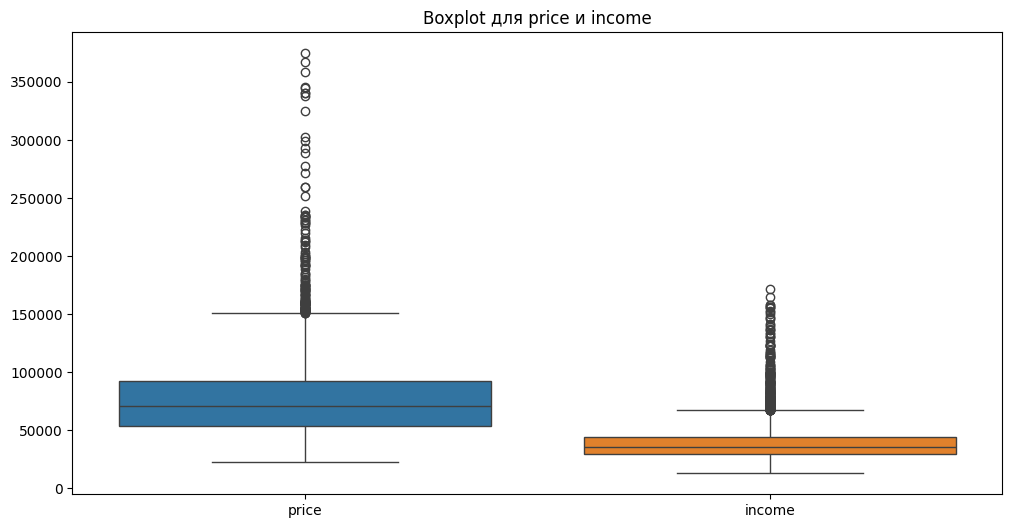

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['price', 'income']])
plt.title('Boxplot для price и income')
plt.show()

Избавляемся от выбросов для дальнейшей оценки распределения

In [13]:
# Вычисляем квартили и IQR для price
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Определяем границы для price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Фильтруем выбросы для price
df_filtered = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]

# Аналогично для income
Q1_income = df['income'].quantile(0.25)
Q3_income = df['income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Фильтруем выбросы для income
df_filtered = df_filtered[(df_filtered['income'] >= lower_bound_income) & (df_filtered['income'] <= upper_bound_income)]

Отобразим распределения с выбросами и без них

In [15]:
print("Описательная статистика до удаления выбросов:")
print(df[['price', 'income']].describe())

print("\nОписательная статистика после удаления выбросов:")
print(df_filtered[['price', 'income']].describe())

Описательная статистика до удаления выбросов:
               price         income
count    9572.000000    9572.000000
mean    76227.832345   38891.424175
std     27427.857115   13077.155572
min     22590.530000   13082.580000
25%     53474.970000   29372.410000
50%     70948.740000   36061.000000
75%     92401.690000   44665.000000
max    374657.730000  171792.000000

Описательная статистика после удаления выбросов:
               price        income
count    9229.000000   9229.000000
mean    73700.083801  37319.058699
std     21835.538886   9236.807281
min     22590.530000  13082.580000
25%     53474.970000  29372.410000
50%     65487.560000  35544.680000
75%     89312.690000  43512.000000
max    150658.370000  67321.000000


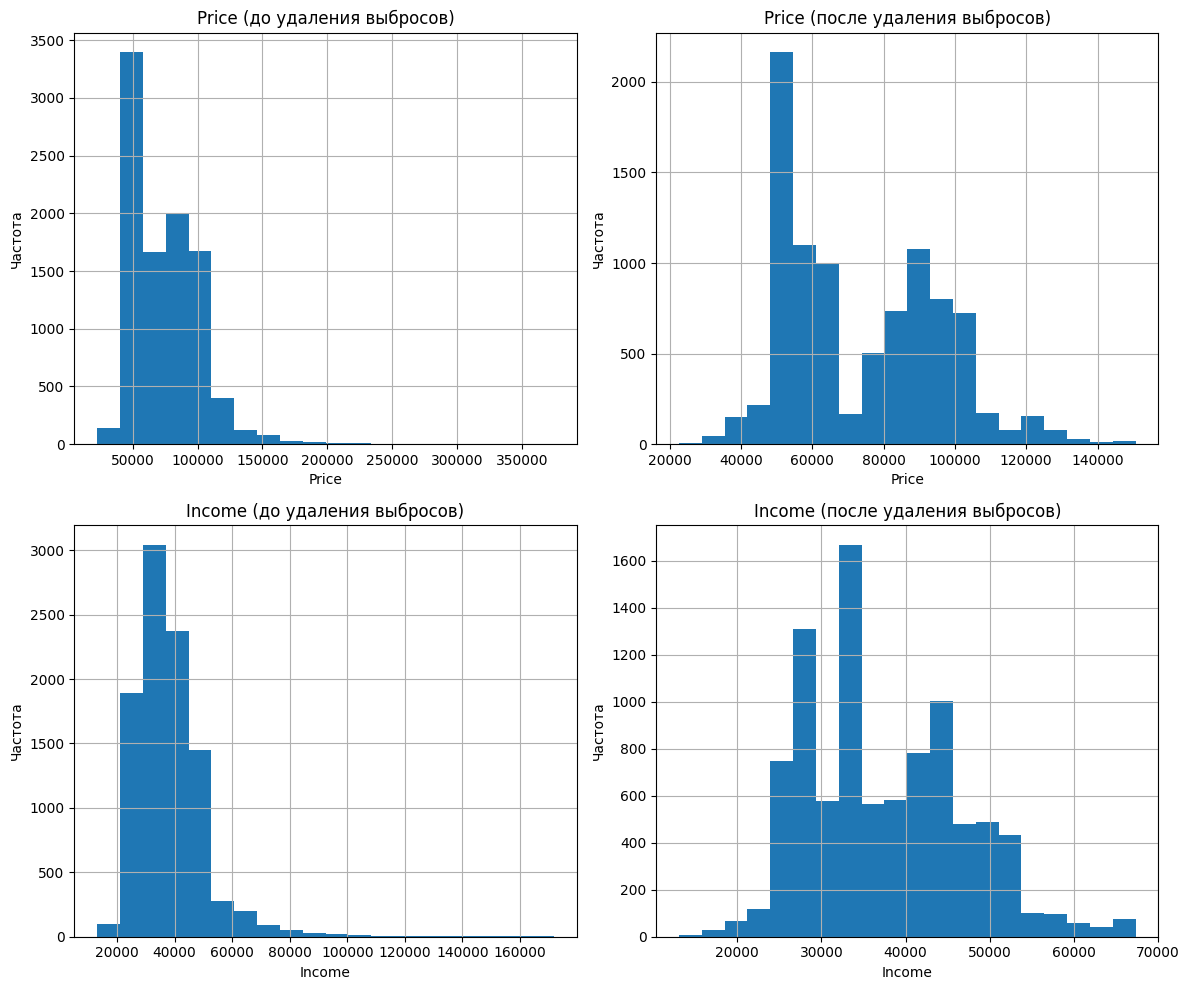

In [18]:
# Создаем сетку 2x2 для графиков
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

df['price'].hist(ax=axes[0, 0], bins=20)
axes[0, 0].set_title('Price (до удаления выбросов)')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Частота')

df_filtered['price'].hist(ax=axes[0, 1], bins=20)
axes[0, 1].set_title('Price (после удаления выбросов)')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Частота')

df['income'].hist(ax=axes[1, 0], bins=20)
axes[1, 0].set_title('Income (до удаления выбросов)')
axes[1, 0].set_xlabel('Income')
axes[1, 0].set_ylabel('Частота')

df_filtered['income'].hist(ax=axes[1, 1], bins=20)
axes[1, 1].set_title('Income (после удаления выбросов)')
axes[1, 1].set_xlabel('Income')
axes[1, 1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Оба признака (price и income) имеют правостороннюю асимметрию как до, так и после удаления выбросов. Это указывает на то, что большинство значений сосредоточено в нижней части диапазона, с редкими выбросами в сторону более высоких значений.

Анализ зависимостей
- Матрица корреляций

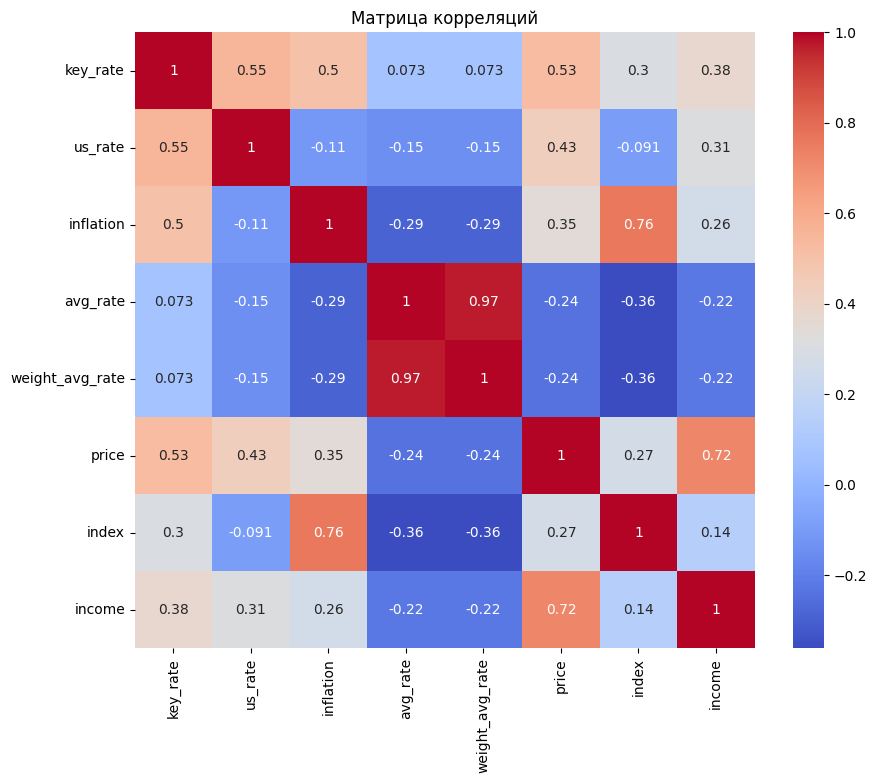

In [21]:
numeric_df = df.select_dtypes(include=['float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()